In [1]:
from maelzel.core import *

In [6]:
struct = ScoreStruct(r'''
3/16, 8=100; 2/16; 3/16; 4/16; 2/16; 3/16; 5/16; 4/16; 5/16; 6/16; 4/16, barline=double
2/16; 4/16; 3/16; 7/16; 2/16; 4/16; 4/16; 5/16; 4/16; 8/16; 4/16, barline=double
3/16; 2/16; 5/16; 6/16; 4/16; 3/16; 4/16; 5/16; 3/16; 6/16; 3/16, barline=double
6/16; 3/16; 4/16; 5/16; 2/16; 3/16; 4/16; 5/16; 8/16; 4/16; 6/16, barline=double
2/16; 3/16; 5/16; 4/16; 3/16; 2/16; 5/16; 2/16; 3/16; 6/16; 2/16, barline=double
3/16; 3/16; 3/16; 3/16; 2/16; 3/16; 4/16; 5/16; 4/16; 8/16; 2/16; 3/16; 4/16; 3/16; 3/16; 3/16; 4/16; 4/16, barline=double

''').activate()


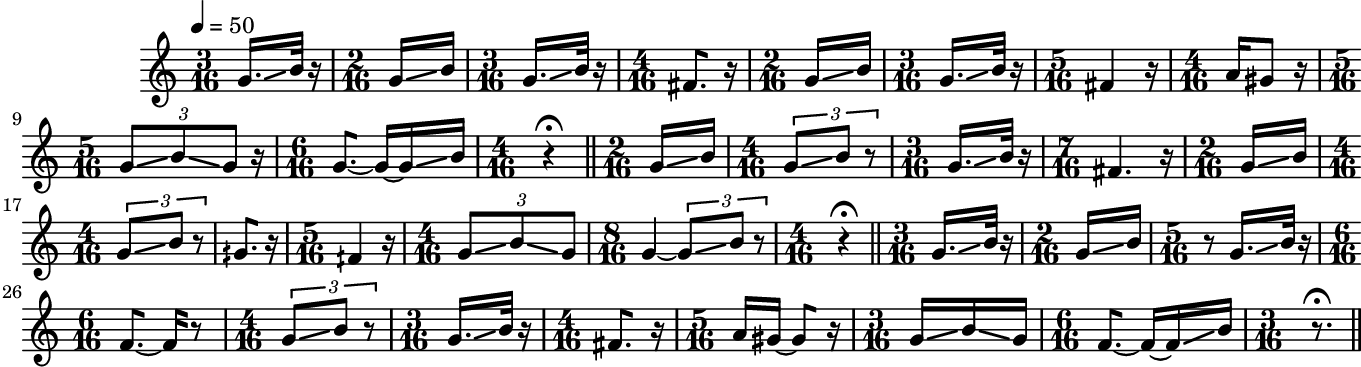

In [7]:
ch = Chain([
    "4G:3/8:gliss", "4B/32", "R/16",
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",
    
    "4G/16:gliss", "4B/16",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#/4", "R/16",
    
    "4A/16", "4G#/8", "R/16",
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3", "R/16",
    "4G~:1", "4G/16:gliss", "4B/16",
    
    Rest(1).addSymbol('fermata'),
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:.375:gliss", "4B/32", "R/16",
    "4F#:1.5", "r/16",
    
    "4G/16:gliss", "4B/16",
    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    "4G+:3/4", "r/16",
    "4F+:1", "r/16",
    
    "4G:1/3:gliss", "4B:1/3:gliss", "4G:1/3",
    "4G~:1", "4G:1/3:gliss", "4B:1/3", "r:1/3",
    
    Rest(1).addSymbol('fermata'),

    "4G:3/8:gliss", "4B/32", "R/16",
    "4G/16:gliss", "4B/16",
    "r/8", "4G:.375:gliss", "4B/32", "R/16",
    "4F/4", "R/8",

    "4G:1/3:gliss", "4B:1/3", "r:1/3",
    "4G:3/8:gliss", "4B/32", "R/16",
    "4F#/8.", "R/16",

    "4A/16", "4G#/8.", "R/16",

    "4G/16:gliss", "4B/16:gliss", "4G/16",
    "4F~/4", "4F/16:gliss", "4B/16",
    Rest("3/4").addSymbol('fermata')
    
])
ch.show()
ch.write("~/tmp/wespe.ly")

Chain([4G:3/8♩:gliss=True:symbols=[Slur(anchor=4G, kind=start, uuid=yidncbu8)], 4B:1/8♩:symbols=[Slur(anchor=4B, kind=end, uuid=yidncbu8)], R:1/4♩, 4G:1/4♩:gliss=True:symbols=[Slur(anchor=4G, kind=start, uuid=jeth7a4i)], 4B:1/4♩:symbols=[Slur(anchor=4B, kind=end, uuid=jeth7a4i)], 4G:3/8♩:gliss=True:symbols=[Slur(anchor=4G, kind=start, uuid=hfokisb3)], 4B:1/8♩:symbols=[Slur(anchor=4B, kind=end, uuid=hfokisb3)], R:1/4♩, 4F♯:3/4♩:symbols=[Articulation(tenuto)], R:1/4♩, …])
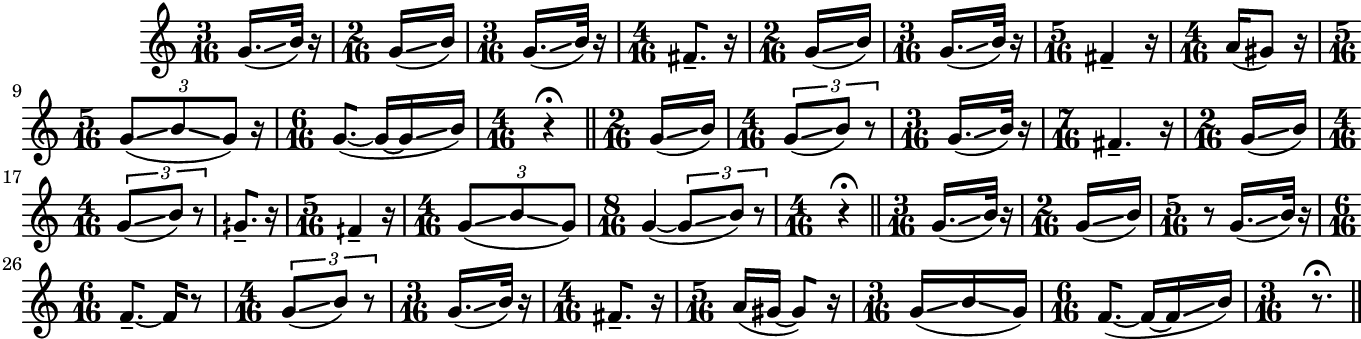

In [5]:
# Add slurs and articulations

ch2 = ch.copy()
for i in range(struct.numMeasures()):
    events = ch2.eventsBetween((i, 0), (i+1, 0))
    if not events or all(ev.isRest() for ev in events):
        continue
    firstev = next(ev for ev in events if not ev.isRest())
    lastev = next(ev for ev in reversed(events) if not ev.isRest())
    if firstev is not lastev:
        firstev.addSpanner('slur', endobj=lastev)
        firstev.setPlay(args=dict(kx=0, ky=0))
    else:
        firstev.addSymbol('tenuto')
        firstev.setPlay(args=dict(kx=0, ky=1))
ch2
    

In [6]:
# legatos
for loc in [(7, 0), (29, 0)]:
    ch2.eventAt(loc).setPlay(glisstime=0.15)

# shorten end gliss
for loc in [(19, F(2,3)), (30, 1/2)]:
    ch2.eventAt(loc).setPlay(end=0.1)
    

OfflineRenderer(sr=44100)
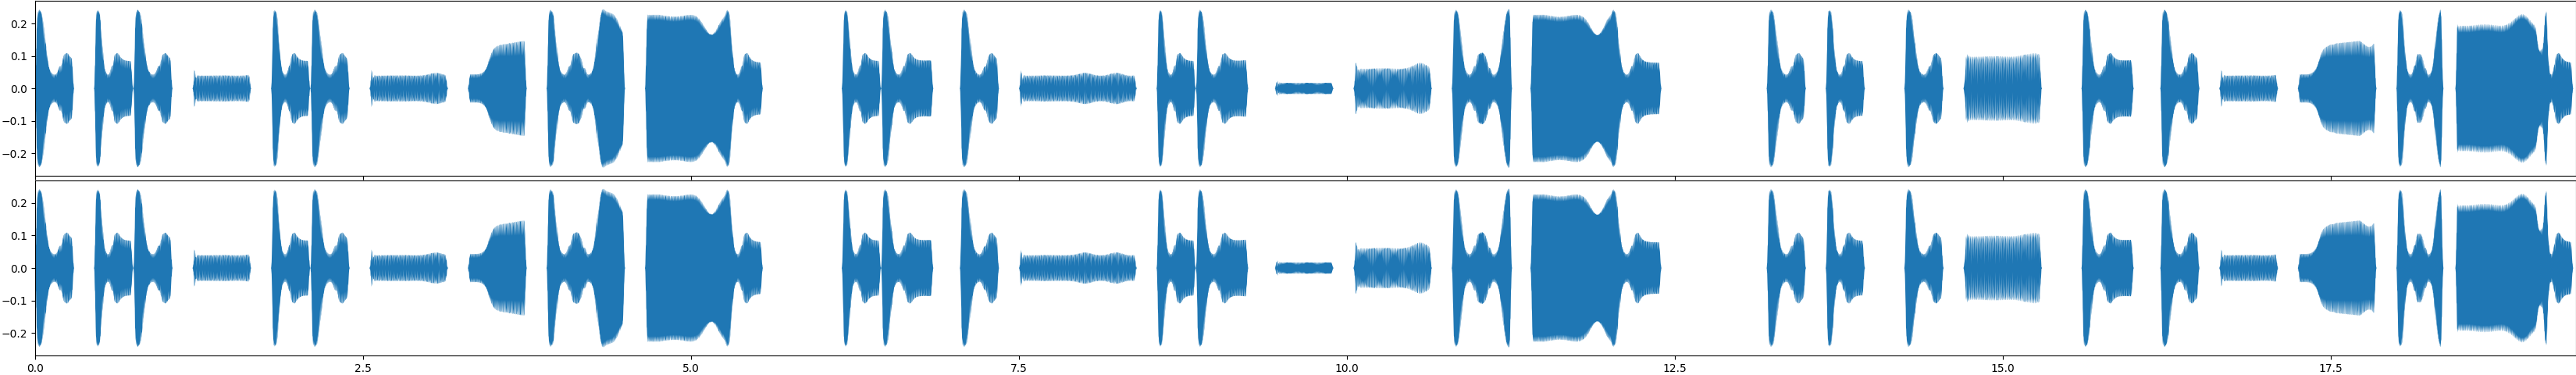

In [7]:
ch2.rec(instr='.sing')

OfflineRenderer(sr=44100)
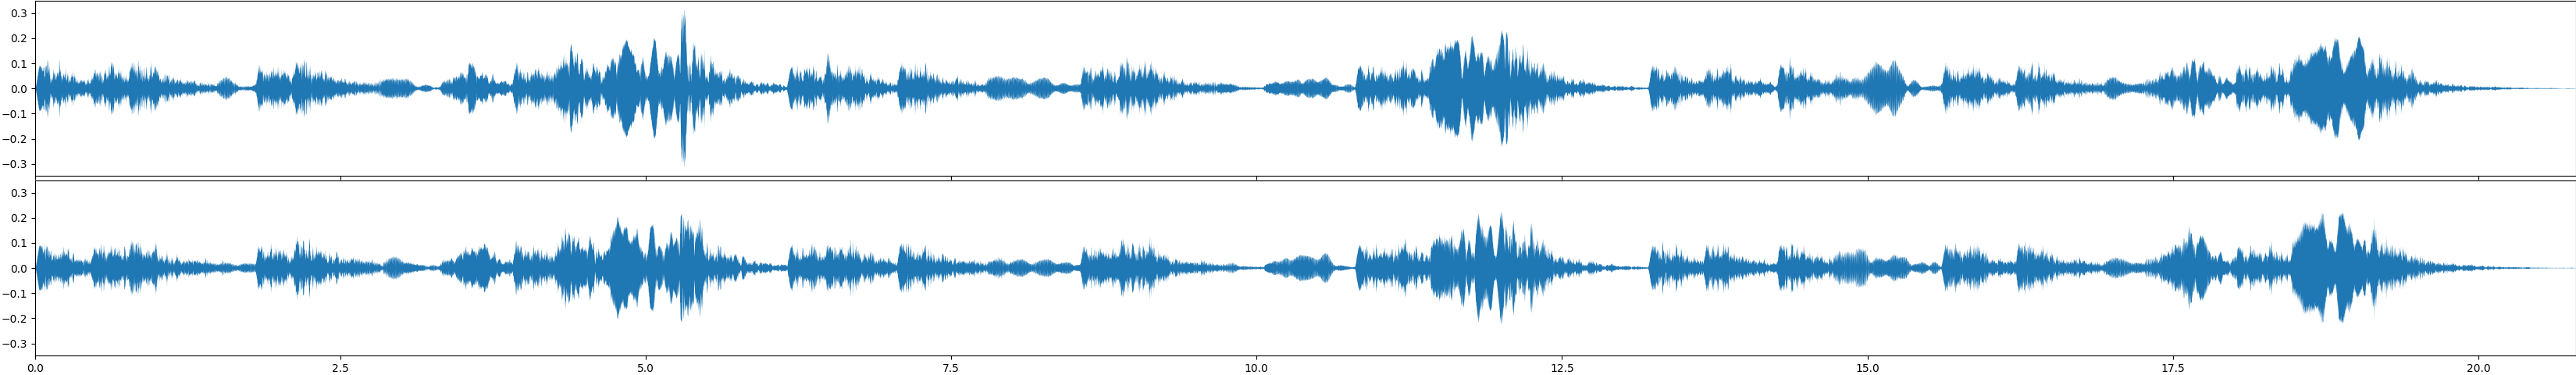

In [8]:
with render() as r:
    ch2.play(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5}, fade=(0.05, 0.1))
    r.sched('.globalreverb', 0, ch2.durSecs() + 1, kfeedback=0.8, kwet=0.5)
r

In [8]:
w = getWorkspace()
sess = w.audioSession()
sess.defInstr('freeverb', r'''
    |kroomsize=0.6, khfdamp=0.35, igain=1.|
    a1pre, a2pre monitor
    a1, a2 freeverb a1pre, a2pre, kroomsize, khfdamp
    a1 *= igain
    a2 *= igain
    outch 1, a1 - a1pre, 2, a2 - a2pre 
''')
    
with play() as s:
    synth = ch2.play(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5}, fade=(0.05, 0.1), gain=3)
    ev = s.sched('freeverb', dur=ch2.durSecs() + 4, priority=2, kroomsize=0.3, khfdamp=0.4)
s
    

using libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

OfflineRenderer(sr=44100)
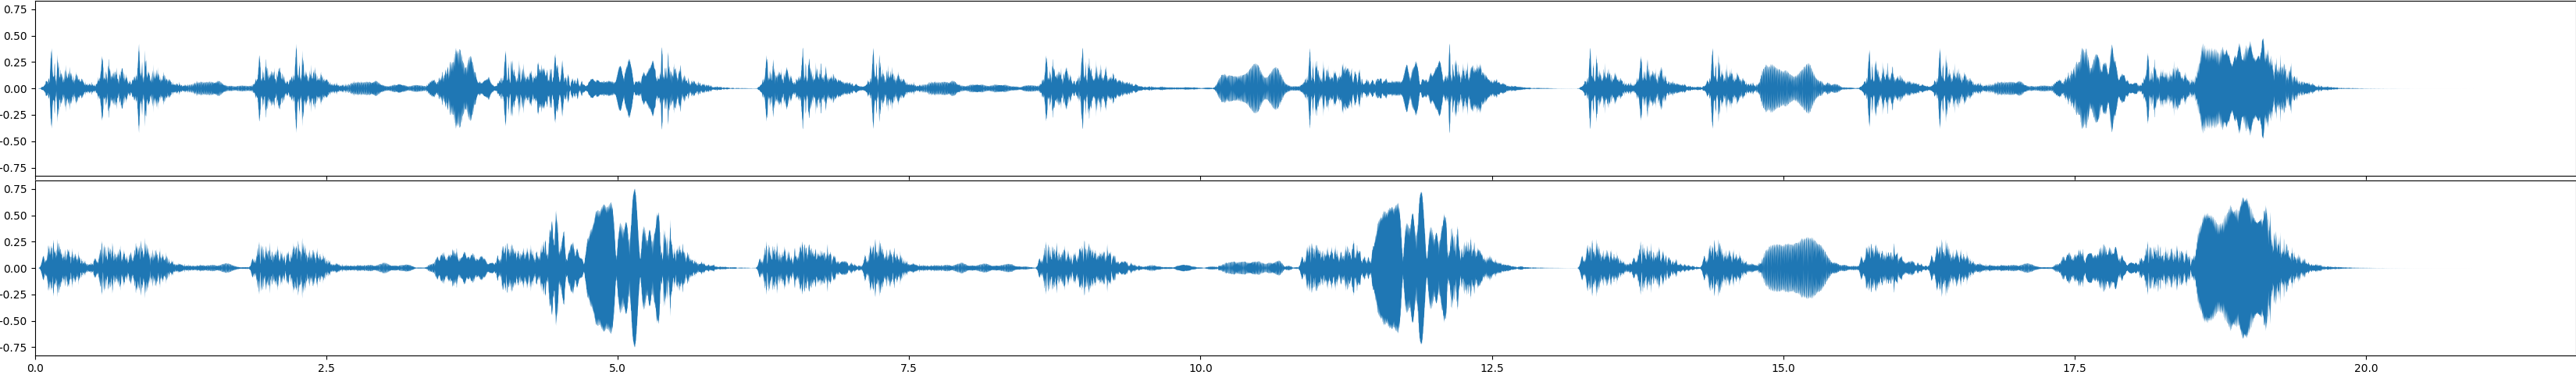

In [9]:
with render() as s:
    ch2.play(instr='.sing', args={'ivibstart': 0.25, 'kvibfreq': 5.5}, fade=(0.05, 0.1), gain=3)
    s.sched('freeverb', dur=ch2.durSecs() + 2, priority=2, kroomsize=0.3, khfdamp=0.5, igain=1.5)
s
    

Score(1 voices)
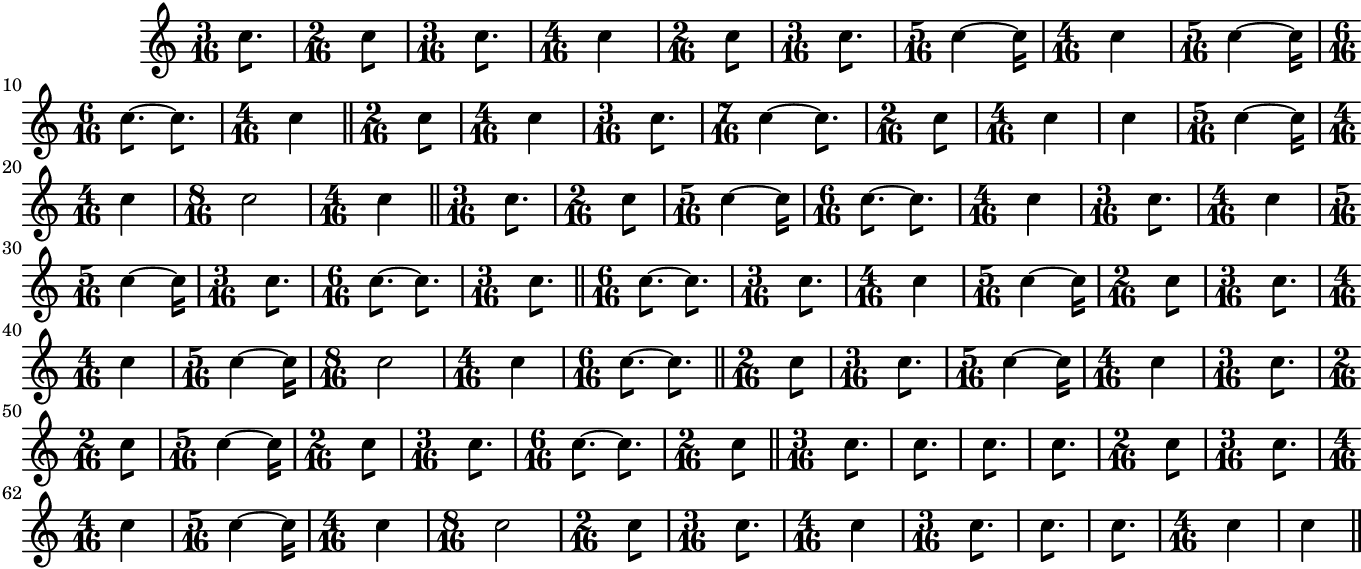

In [9]:
struct.makeClickTrack()